In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("LendingClub_scaled.csv")

In [3]:
df.head()

,funded_amnt,term,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App,loan_status
0,-1.279802,-0.579069,-1.240009,1.098272,-0.328292,-1.324187,-0.367941,-0.896622,-0.630601,-0.912299,...,0,0,0,0,0,0,0,1,0,0
1,1.128241,-0.579069,1.415401,1.098272,-0.189794,-0.260251,0.756352,1.830533,0.232760,-1.345031,...,0,0,0,0,1,0,0,1,0,0
2,-0.503750,1.726909,-0.604462,-0.865783,0.356344,0.715635,0.756352,0.012430,0.253946,0.521900,...,0,0,0,0,0,0,0,1,0,0
3,-0.326856,-0.579069,-0.165468,-0.585204,-0.619137,-0.874504,-0.367941,-1.260242,-0.351030,0.682629,...,0,0,0,0,0,0,0,1,0,0
4,0.591852,-0.579069,0.719605,1.098272,1.402929,-0.405953,-0.367941,0.012430,3.272592,1.346153,...,0,0,0,0,0,0,0,1,0,0


### Now lets pick best model

In [7]:
df_sam = df.sample(n = 50000)  ### only pick few rows randomly to see the best model

In [8]:
df_sam.shape

(50000, 76)

In [18]:
df_sam.loan_status.value_counts()

0    40321
1     9679
Name: loan_status, dtype: int64

In [16]:
import pycaret
print('Using PyCaret Version', pycaret.__version__)

Using PyCaret Version 2.2.0


In [32]:
# compare machine learning algorithms on the sonar classification dataset

from pycaret.classification import setup
from pycaret.classification import compare_models

# setup the dataset
grid = setup(data=df_sam, target="loan_status")
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8098,0.7156,0.0640,0.5747,0.1150,0.0791,0.1427,2.7600
lr,Logistic Regression,0.8091,0.7146,0.0671,0.5516,0.1195,0.0810,0.1405,1.3690
ridge,Ridge Classifier,0.8084,0.0000,0.0439,0.5587,0.0812,0.0545,0.1142,0.0450
catboost,CatBoost Classifier,0.8084,0.7127,0.0908,0.5268,0.1546,0.1036,0.1563,8.5620
rf,Random Forest Classifier,0.8081,0.6968,0.0420,0.5549,0.0779,0.0519,0.1107,1.6680
lightgbm,Light Gradient Boosting Machine,0.8081,0.7128,0.0800,0.5267,0.1386,0.0922,0.1462,0.4490
ada,Ada Boost Classifier,0.8077,0.7094,0.0784,0.5172,0.1360,0.0898,0.1424,0.5950
lda,Linear Discriminant Analysis,0.8067,0.7132,0.1127,0.5000,0.1837,0.1212,0.1655,0.2160
et,Extra Trees Classifier,0.8064,0.6904,0.0596,0.4935,0.1062,0.0674,0.1174,2.1590
svm,SVM - Linear Kernel,0.8034,0.0000,0.0514,0.4313,0.0869,0.0506,0.0873,0.1970


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5403, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### let's pick the best base classifier model from the above and save it and tune the hyperparameter

In [33]:
from pycaret.classification import *
mdl = create_model('nb', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3371,0.6787,0.9275,0.2164,0.3509,0.0548,0.1290
1,0.3640,0.6795,0.9260,0.2234,0.3600,0.0708,0.1536
2,0.3229,0.6920,0.9527,0.2160,0.3521,0.0543,0.1387
3,0.3363,0.6872,0.9393,0.2177,0.3535,0.0581,0.1391
4,0.3606,0.6765,0.9408,0.2244,0.3624,0.0734,0.1634
5,0.3517,0.6769,0.9247,0.2201,0.3556,0.0627,0.1407
6,0.4266,0.6830,0.8922,0.2380,0.3757,0.1013,0.1832
7,0.3611,0.6718,0.9335,0.2239,0.3611,0.0714,0.1574
8,0.3520,0.6656,0.9040,0.2174,0.3505,0.0562,0.1231
9,0.4324,0.6891,0.8905,0.2395,0.3774,0.1048,0.1872


In [34]:
Tuned_rf = tune_model(mdl, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5591,0.6789,0.7663,0.2722,0.4017,0.1632,0.2186
1,0.5997,0.6797,0.6982,0.2828,0.4026,0.1760,0.2168
2,0.5126,0.6921,0.8328,0.2611,0.3976,0.1466,0.2181
3,0.5303,0.6874,0.7751,0.2599,0.3893,0.1407,0.1972
4,0.5557,0.6769,0.7293,0.2643,0.3880,0.1459,0.1926
5,0.5609,0.6770,0.7326,0.2678,0.3922,0.1520,0.1997
6,0.5766,0.6830,0.7164,0.2732,0.3956,0.1605,0.2050
7,0.6674,0.6718,0.5480,0.3019,0.3893,0.1863,0.2020
8,0.5683,0.6658,0.7149,0.2686,0.3905,0.1520,0.1960
9,0.5470,0.6893,0.7737,0.2675,0.3976,0.1549,0.2118


In [22]:
#save_model(best, model_name='best-model')

In [51]:
#loaded_bestmodel = load_model('best-model')
#print(loaded_bestmodel)

## From the above analysis ie using PyCaret, it is seen that GradientBoostingClassifier and Naive Bayes is the best base model among the others. So, hyperparameters are tuned in the next steps:

In [36]:
y=df["loan_status"]
X = df.drop(["loan_status"],axis =1)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [37]:
y.value_counts()

0    880570
1    210071
Name: loan_status, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [65]:
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print()
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))

Shape of X_train: (763448, 75)
Shape of y_train: (763448,)

Shape of X_test: (327193, 75)
Shape of y_test: (327193,)


In [40]:
model = GaussianNB()
#model = SVC()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.26%


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73    176376
           1       0.29      0.65      0.41     41753

    accuracy                           0.63    218129
   macro avg       0.59      0.64      0.57    218129
weighted avg       0.77      0.63      0.67    218129



### Let's try another model "Gradient Boosting Classifier" using default parameter values

In [51]:
## BASE MODEL
from sklearn.metrics import f1_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier()
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('GradientBoostingClassifier: Accuracy=%.3f' % (ac))
print('GradientBoostingClassifier: f1-score=%.3f' % (f1))

GradientBoostingClassifier: Accuracy=0.812
GradientBoostingClassifier: f1-score=0.747


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89    176376
           1       0.57      0.07      0.12     41753

    accuracy                           0.81    218129
   macro avg       0.69      0.53      0.51    218129
weighted avg       0.77      0.81      0.75    218129



### Now let's tune hyparameter

In [ ]:
# ### some of the default parameters in SKLearn Setting
# Tree specific parameters
# n_estimators=100 (number of trees)
# max_depth=3
# min_samples_split=2
# min_samples_leaf=1
# subsample=1.0

# Other Parameters
# learning_rate=0.1 (shrinkage)
# subsample: 1

In [56]:
# from sklearn.model_selection import GridSearchCV
# p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500], \
#           'max_depth':[2,3,4,5,6,7]}

# tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
#             param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# tuning.fit(X_train,y_train)
# tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [58]:
# from sklearn.model_selection import GridSearchCV
# p_test1 = {'learning_rate':[0.15,0.1,0.05], 'n_estimators':[100, 500,1000,1500], \
#           'max_depth':[5, 10, 15]}

# tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
#             param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
# tuning.fit(X_train,y_train)
# tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [67]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 2]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print("F1 score (validation): {0:.3f}".format(f1_score(y_test, y_pred, average='weighted')))
    #f1 = f1_score(y_test, y_pred, average='weighted')
    print()

Learning rate:  0.05
Accuracy score (training): 0.807
Accuracy score (validation): 0.809
F1 score (validation): 0.723

Learning rate:  0.1
Accuracy score (training): 0.807
Accuracy score (validation): 0.809
F1 score (validation): 0.723

Learning rate:  0.25
Accuracy score (training): 0.807
Accuracy score (validation): 0.809
F1 score (validation): 0.723

Learning rate:  0.5
Accuracy score (training): 0.808
Accuracy score (validation): 0.809
F1 score (validation): 0.731

Learning rate:  0.75
Accuracy score (training): 0.807
Accuracy score (validation): 0.808
F1 score (validation): 0.739

Learning rate:  1
Accuracy score (training): 0.804
Accuracy score (validation): 0.805
F1 score (validation): 0.745

Learning rate:  2
Accuracy score (training): 0.793
Accuracy score (validation): 0.794
F1 score (validation): 0.752



In [69]:
max_depths = [2,4,6,8,10]
for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = max_depth, random_state = 0)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("Max depth: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print("F1 score (validation): {0:.3f}".format(f1_score(y_test, y_pred, average='weighted')))    
    print()

Max depth:  2
Accuracy score (training): 0.804
Accuracy score (validation): 0.805
F1 score (validation): 0.745

Max depth:  4
Accuracy score (training): 0.806
Accuracy score (validation): 0.806
F1 score (validation): 0.753

Max depth:  6
Accuracy score (training): 0.807
Accuracy score (validation): 0.805
F1 score (validation): 0.754

Max depth:  8
Accuracy score (training): 0.809
Accuracy score (validation): 0.804
F1 score (validation): 0.752

Max depth:  10
Accuracy score (training): 0.815
Accuracy score (validation): 0.800
F1 score (validation): 0.756



In [70]:
n_estimators = [20, 30,50,100]

for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = 1, max_features=2, max_depth = 6, random_state = 0)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print("n_estimator: ", n_estimator)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print("F1 score (validation): {0:.3f}".format(f1_score(y_test, y_pred, average='weighted')))    
    print()



n_estimator:  20
Accuracy score (training): 0.807
Accuracy score (validation): 0.805
F1 score (validation): 0.754

n_estimator:  30
Accuracy score (training): 0.808
Accuracy score (validation): 0.805
F1 score (validation): 0.756

n_estimator:  50
Accuracy score (training): 0.810
Accuracy score (validation): 0.805
F1 score (validation): 0.757

n_estimator:  100
Accuracy score (training): 0.813
Accuracy score (validation): 0.804
F1 score (validation): 0.757



### Now train the model using above hyperparameter 
#### Use learning rate = 1, max_depth=6, and n_estimator=50

In [75]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 1, max_features=2, max_depth = 6, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
print("F1 score (validation): {0:.3f}".format(f1_score(y_test, y_pred, average='weighted')))    

Accuracy score (training): 0.810
Accuracy score (validation): 0.805
F1 score (validation): 0.757


In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {"C":[0.001, 0.1, 1, 10, 100]}
# cl = LogisticRegression()
# cl_cv = GridSearchCV(cl, param_grid, cv=5)
# cl_cv.fit(Xlr, ylr)
# print("Best Score:" + str(cl_cv.best_score_))
# print("Best Parameters: " + str(cl_cv.best_params_))
# print(cl_cv.best_estimator_)

### plot AOC

AUC: 0.7054994943705348


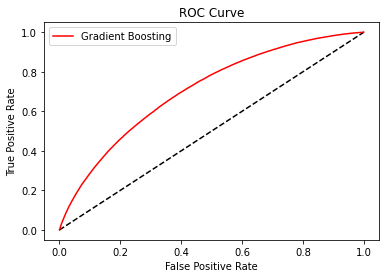

In [76]:
# Calculated probability
y_pred_prob = gb.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Area under the curve.
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'r', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### PLOT Variable importance

75


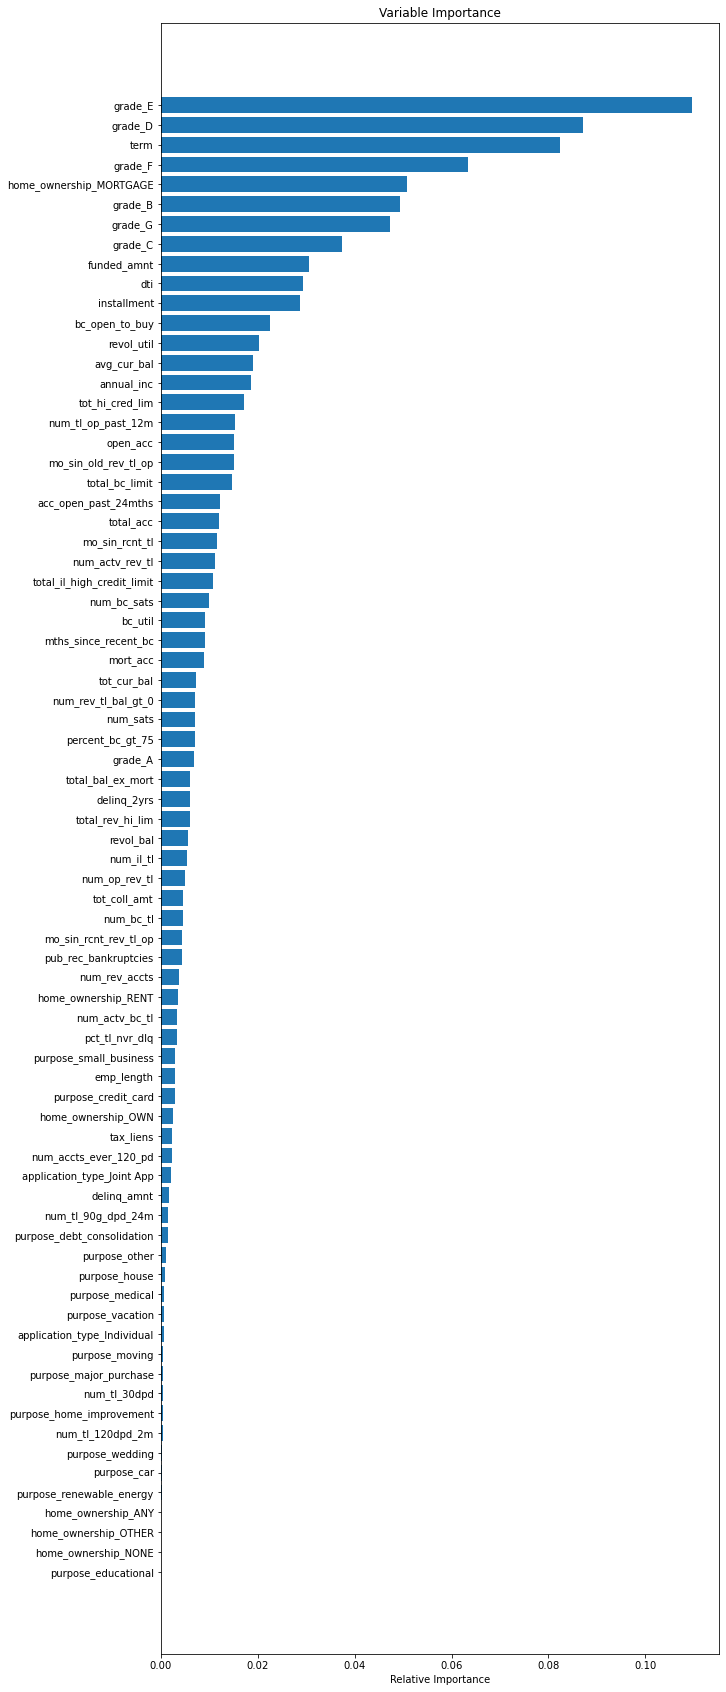

In [77]:

feature_importance = gb.feature_importances_
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance) #[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()